In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
from datetime import datetime
import random
import yaml
from datasets import preprocessing
from datasets import questions

with open('resources.yaml') as f:
    resources = yaml.safe_load(f)

In [12]:
#import csv file as dataframe
data=pd.read_csv(resources['path']['raw']['surveydata'])
#inspect data
data.head()

,ID,Start,Datum und Zeit,1. Are you using external data sources for the training of Machine Learning models?,2. Are you currently working for a company that deploys Machine Learning in any organizational unit?,3. Are you working with Machine Learning outside of a company?,4. Can the models you are training be used in a specific industrial or organizational context?,Country,Accounting,Airlines/Aviation,...,25. Do you know whether you are training models based on traditional Machine Learning or Deep Learning?,26. Which model complexity do you use most often?,27. Which model building process do you rely on?,"Non-automated frameworks (e.g. scikit-learn, Keras or TensorFlow in Python)","Automated frameworks (e.g. AutoSklearn, Autokeras)",I don't know.4,Textfeld.3,28. Which learning technique do you use most often?,29. Which external sources for data are you currently using to train Machine Learning models?,30. This is the last question before the end of the questionnaire. Are you sure you are done and want to submit the survey?
0,71567565,22.06.2020 17:28,22.06.2020 17:29,No,NaN,Yes,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ja
1,71589259,23.06.2020 06:15,23.06.2020 06:15,I don't know,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,71597949,23.06.2020 10:57,23.06.2020 11:04,"Yes, sometimes as enrichment and sometimes as ...",Yes,NaN,NaN,Israel,NaN,NaN,...,ja,2.0,NaN,1.0,1.0,NaN,SparkBeyond,Supervised learning,Dan Ofer's SB open datasets(https://docs.googl...,ja
3,71600323,23.06.2020 11:43,23.06.2020 11:44,"Yes, sometimes as enrichment and sometimes as ...",No,Yes,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,71602292,23.06.2020 12:13,23.06.2020 12:28,"Yes, as enrichment of our internal data",No,Yes,Yes,_Other,NaN,NaN,...,ja,0.0,NaN,1.0,NaN,NaN,NaN,Supervised learning,NIST: National Institute of Standards and Tech...,ja


In [14]:
for i in data.columns:
    print(i)

ID
Start
Datum und Zeit
1. Are you using external data sources for the training of Machine Learning models?
2. Are you currently working for a company that deploys Machine Learning in any organizational unit?
3. Are you working with Machine Learning outside of a company?
4. Can the models you are training be used in a specific industrial or organizational context?
Country
Accounting
Airlines/Aviation
Alternative Dispute Resolution
Alternative Medicine
Animation
Apparel &amp; Fashion
Architecture &amp; Planning
Arts and Crafts
Automotive
Aviation &amp; Aerospace
Banking
Biotechnology
Broadcast Media
Building Materials
Business Supplies and Equipment
Capital Markets
Chemicals
Civic &amp; Social Organization
Civil Engineering
Commercial Real Estate
Computer &amp; Network Security
Computer Games
Computer Hardware
Computer Networking
Computer Software
Construction
Consumer Electronics
Consumer Goods
Consumer Services
Cosmetics
Dairy
Defense &amp; Space
Design
Education Management
E-Learning

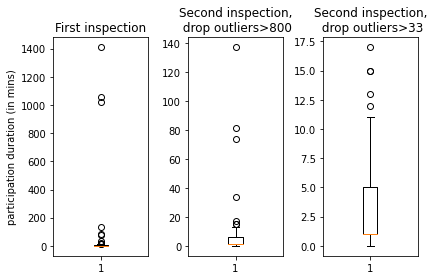

The average time for completing the survey in one of the foreseen paths is 7.68 minutes.


In [15]:
#caclulate average participation time of those who answered "all" questions
#calculate the time in minutes each participant spent on the survey
part_dur=preprocessing.calculate_average_time(data["Start"], data["Datum und Zeit"])

#create new column for time spent "time spent" in data
data["time spent (in mins)"]=part_dur

#inspect data and remove outliers
fig = plt.figure(tight_layout=True)
gs = gridspec.GridSpec(1, 3)
ax = fig.add_subplot(gs[0,0])
ax.boxplot(data["time spent (in mins)"])
ax.set_title("First inspection")
ax.set_ylabel("participation duration (in mins)")
ax = fig.add_subplot(gs[0,1])
ax.boxplot(data[data["time spent (in mins)"]<800]["time spent (in mins)"])
ax.set_title("Second inspection,\n drop outliers>800")
ax = fig.add_subplot(gs[0,2])
ax.boxplot(data[data["time spent (in mins)"]<33]["time spent (in mins)"])
ax.set_title("Second inspection,\n drop outliers>33")
plt.show()

#Calculate the average time spent to answer full survey, without outliers
#someone who answered Question 29, participated throughout the whole survey
fullparticipation=data['29. Which external sources for data are you currently using to train Machine Learning models?'].dropna().index.tolist()
no_outliers=data.loc[fullparticipation,:]["time spent (in mins)"]<33
avg_time=(data.loc[fullparticipation,"time spent (in mins)"][no_outliers].sum())/(len(data.loc[fullparticipation,"time spent (in mins)"][no_outliers]))
print("The average time for completing the survey in one of the foreseen paths is", round(avg_time,3), "minutes.")

In [16]:
print(questions.create('./resources.yaml'))
Q1 = questions.Q1
Q2 = questions.Q2
Q3 = questions.Q3
Q4 = questions.Q4
Q5and10 = questions.Q5and10
ind_group = questions.ind_group
Q6and12 = questions.Q6and12
Q7and9 = questions.Q7and9
Q8 = questions.Q8
Q11 = questions.Q11
Q13 = questions.Q13
Q14 = questions.Q14
Q15 = questions.Q15
Q16 = questions.Q16
Q17 = questions.Q17
Q18 = questions.Q18
Q19 = questions.Q19
Q20 = questions.Q20
Q21 = questions.Q21
Q22 = questions.Q22
Q23 = questions.Q23
Q24 = questions.Q24
Q25 = questions.Q25
Q26 = questions.Q26
Q27 = questions.Q27
Q28 = questions.Q28
Q29 = questions.Q29
Q30 = questions.Q30

None


In [8]:
# create all possible filters that may be applied to the results of each question

filters = []
filternames = []
# extent of external questions.data usage
filter_only = questions.Q1 == "Yes, as stand-alone training questions.data"
filter_mix = questions.Q1 == "Yes, sometimes as enrichment and sometimes as stand-alone training questions.data"
filter_enrich = questions.Q1 == "Yes, as enrichment of our internal questions.data"
filters.append(filter_only)
filters.append(filter_mix)
filters.append(filter_enrich)
filternames.append("Purely external questions.data for training")
filternames.append("External questions.data purely or as enrichment")
filternames.append("External questions.data as enrichment")

# in-company use vs outside-of-company use
filter_incompany = questions.Q2 == "Yes"
filter_outcompany = questions.Q4 == "Yes"
filters.append(filter_incompany)
filters.append(filter_outcompany)
filternames.append("Development inside of company")
filternames.append("Development outside of company")

# get the filters for large vs small companies
print(type(questions.Q8))
filter_small = questions.Q8.isin(["less than 10", "between 10 and 50", "between 50 and 250"])
filter_large = questions.Q8.isin(["between 250 and 500", "between 500 and 1000", "more than 1000"])
filters.append(filter_small)
filters.append(filter_large)
filternames.append("Companies with up to 250 employees")
filternames.append("Companies with more than 250 employees")

# get the filters for the different industries
filter_art = questions.data["Art"] == 1
filter_cons = questions.data["Construction"] == 1
filter_corp = questions.data["Corporate"] == 1
filter_edu = questions.data["Education"] == 1
filter_fin = questions.data["Finance"] == 1
filter_good = questions.data["Goods"] == 1
filter_gov = questions.data['Government'] == 1
filter_hlth = questions.data["Healthcare"] == 1
filter_leg = questions.data["Legal"] == 1
filter_man = questions.data["Manufacturing"] == 1
filter_med = questions.data["Media & entertainment"] == 1
filter_org = questions.data["Organization"] == 1
filter_rec = questions.data["Recreation"] == 1
filter_serv = questions.data["Service"] == 1
filter_tech = questions.data["Technology"] == 1
filter_tran = questions.data["Transportation"] == 1
filters.append(filter_art)
filters.append(filter_cons)
filters.append(filter_corp)
filters.append(filter_edu)
filters.append(filter_fin)
filters.append(filter_good)
filters.append(filter_gov)
filters.append(filter_hlth)
filters.append(filter_leg)
filters.append(filter_man)
filters.append(filter_med)
filters.append(filter_org)
filters.append(filter_rec)
filters.append(filter_serv)
filters.append(filter_tech)
filters.append(filter_tran)
filternames.append("Art")
filternames.append("Construction")
filternames.append("Corporate")
filternames.append("Education")
filternames.append("Finance")
filternames.append("Goods")
filternames.append('Government')
filternames.append("Healthcare")
filternames.append("Legal")
filternames.append("Manufacturing")
filternames.append("Media & entertainment")
filternames.append("Organization")
filternames.append("Recreation")
filternames.append("Service (industry group)")
filternames.append("Technology")
filternames.append("Transportation")

# get the filters for the different application areas
filter_inboundlogistics = questions.data["Inbound logistics"] == 1
filter_production = questions.data["Production"] == 1
filter_outboundlogistics = questions.data["Outbound logistics"] == 1
filter_marketing = questions.data["Marketing, sales & distribution"] == 1
filter_service = questions.data["Service.1"] == 1
filter_company_infrastructure = questions.data["Company infrastructure"] == 1
filter_HR_management = questions.data["HR management"] == 1
filter_research_development = questions.data["R&D"] == 1
filter_procurement = questions.data["Procurement"] == 1
filter_finances_controlling = questions.data["Finances & controlling"] == 1
filters.append(filter_inboundlogistics)
filters.append(filter_production)
filters.append(filter_outboundlogistics)
filters.append(filter_marketing)
filters.append(filter_service)
filters.append(filter_company_infrastructure)
filters.append(filter_HR_management)
filters.append(filter_research_development)
filters.append(filter_procurement)
filters.append(filter_finances_controlling)
filternames.append("Inbound Logistics")
filternames.append("Production")
filternames.append("Outbound logistics")
filternames.append("Marketing, sales & distribution")
filternames.append("Service (value chain)")
filternames.append("Company infrastructure")
filternames.append("HR management")
filternames.append("Research & Development")
filternames.append("Procurement")
filternames.append("Finances & controlling")

# filter for primary vs supporting activities
primary_activities = questions.data[
    ['Inbound logistics', 'Production', 'Outbound logistics', 'Marketing, sales & distribution', 'Service']]
filter_primary = primary_activities.sum(1) > 0
supporting_activities = questions.data[
    ['Company infrastructure', 'HR management', 'R&D', 'Procurement', 'Finances & controlling']]
filter_supporting = supporting_activities.sum(1) > 0
filters.append(filter_primary)
filters.append(filter_supporting)
filternames.append("Primary activities of the value chain")
filternames.append("Supporting activities of the value chain")

# filter for traditional ML vs DL
filter_ML = questions.Q26 < 45
filter_DL = questions.Q26 > 55
filters.append(filter_ML)
filters.append(filter_DL)
filternames.append("Traditional machine learning")
filternames.append("Deep learning")

# filter for structured vs unstructured questions.data
filter_structured = questions.Q17 < 21
filter_unstructured = questions.Q17 > 79
filters.append(filter_structured)
filters.append(filter_unstructured)
filternames.append("Structured questions.data")
filternames.append("Unstructured questions.data")

# filter for automated framework usage
filter_automated = questions.data["Automated frameworks (e.g. AutoSklearn, Autokeras)"] == 1
filters.append(filter_automated)
filternames.append("Using AutoML")

# filter for those who named questions.data pools in last question
datapool = questions.Q29.dropna().index.tolist()
filter_datapool = questions.data.index.isin(datapool)
filters.append(filter_datapool)
filternames.append("Answered last question")

sum_counts = []
for filter in filters:
    sum_counts.append(filter.sum())

filter_df = pd.DataFrame(list(zip(filternames, sum_counts)),
                         columns=['Filter name', 'Participants covered by filter'])

filter_df = filter_df.sort_values(by='Participants covered by filter', ascending=False).reset_index()

print("For the analysis of the results, a total of", len(filter_df.index),
      "filters has been created to differentiate findings by company")
print(
    "size, application area regarding value chain (one by one and primary versus supporting activities, industry group")
print("as well as whether the participants worked with ML in a company or developed ML models for organizational use")
print("outside of one, such as e.g. researchers or government officials.")
filter_df.drop(columns="index")

<class 'pandas.core.series.Series'>
For the analysis of the results, a total of 41 filters has been created to differentiate findings by company
size, application area regarding value chain (one by one and primary versus supporting activities, industry group
as well as whether the participants worked with ML in a company or developed ML models for organizational use
outside of one, such as e.g. researchers or government officials.


,Filter name,Participants covered by filter
0,Development inside of company,54
1,Supporting activities of the value chain,32
2,Answered last question,29
3,Research & Development,26
4,Primary activities of the value chain,25
5,Development outside of company,19
6,Companies with up to 250 employees,19
7,Traditional machine learning,17
8,Companies with more than 250 employees,16
9,Technology,16


125 participants answered the question 'Are you using external data sources for the training of Machine Learning models?' as follows:


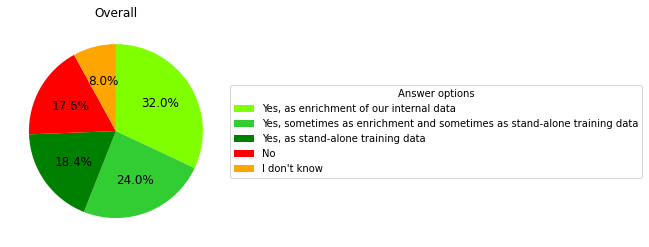

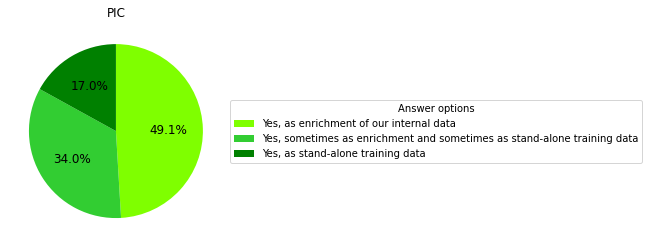

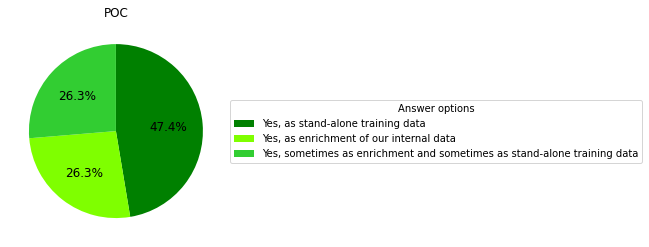

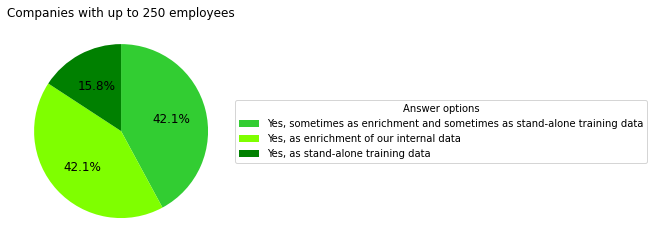

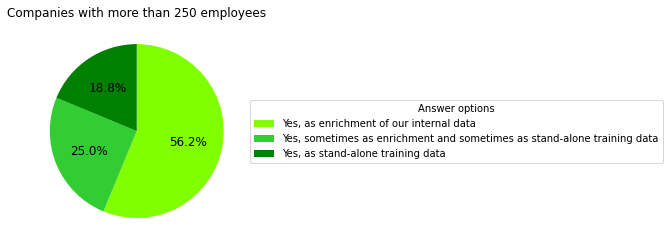

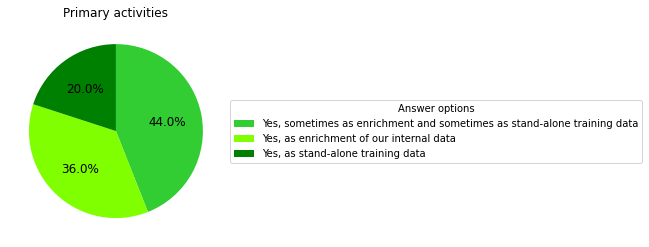

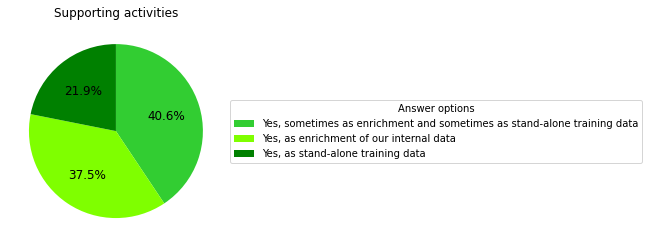

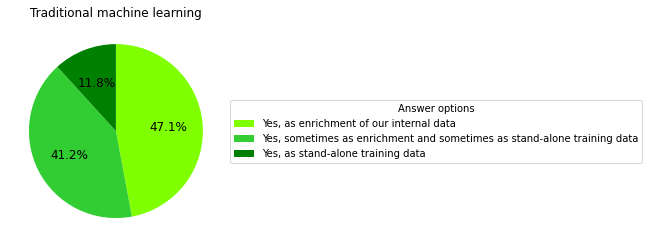

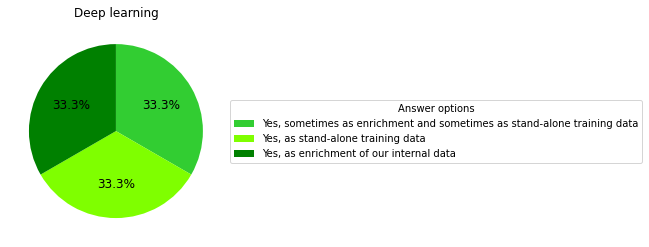

In [9]:
from datasets.help import draw, show

#Q1 - external data usage in ML
Q1=data["1. Are you using external data sources for the training of Machine Learning models?"]
datause=Q1.value_counts()
partQ1=datause.sum()


print(partQ1, "participants answered the question 'Are you using external data sources for the training of Machine Learning models?' as follows:")



draw(0, list(datause.index), list(datause), "Overall", ["chartreuse", "limegreen", "green", "red", "orange"])

trueforcompany=data["1. Are you using external data sources for the training of Machine Learning models?"]
trueforcompanycount=trueforcompany[filter_incompany].value_counts().drop(labels="I don't know")
draw(1, list(trueforcompanycount.index), list(trueforcompanycount), "PIC", ["chartreuse", "limegreen", "green", "red", "orange"])

trueforoutsidecount=trueforcompany[filter_outcompany].value_counts()
draw(2, list(trueforoutsidecount.index), list(trueforoutsidecount), "POC", [ "green","chartreuse", "limegreen"])

trueforoutsidecount=trueforcompany[filter_small].value_counts()
draw(3, list(trueforoutsidecount.index), list(trueforoutsidecount), "Companies with up to 250 employees", [ "limegreen","chartreuse","green"])

trueforoutsidecount=trueforcompany[filter_large].value_counts()
draw(4, list(trueforoutsidecount.index), list(trueforoutsidecount), "Companies with more than 250 employees", [ "chartreuse","limegreen","green"])

trueforoutsidecount=trueforcompany[filter_primary].value_counts()
draw(5, list(trueforoutsidecount.index), list(trueforoutsidecount), "Primary activities", [ "limegreen","chartreuse","green"])

trueforoutsidecount=trueforcompany[filter_supporting].value_counts()
draw(6, list(trueforoutsidecount.index), list(trueforoutsidecount), "Supporting activities", ["limegreen","chartreuse","green"])

trueforoutsidecount=trueforcompany[filter_ML].value_counts()
draw(7, list(trueforoutsidecount.index), list(trueforoutsidecount), "Traditional machine learning", ["chartreuse","limegreen","green"])

trueforoutsidecount=trueforcompany[filter_DL].value_counts()
draw(8, list(trueforoutsidecount.index), list(trueforoutsidecount), "Deep learning", ["limegreen","chartreuse","green"])

show()

In [10]:
#drop the irrelevant participants
criteria1=questions.data[questions.Q1=="No"].index
criteria2=questions.data[questions.Q1=="I don't know"].index
print(len(criteria1), "participants were filtered out since they were not using external data for the training of ML models, an additional", len(criteria2))
print("were filtered out since they did not know whether or not they were using external data.")
data=questions.data.drop(index=criteria1)
data=data.drop(index=criteria2)
data.to_csv('./data/processed/data_without_irrelevant_participants.csv')

22 participants were filtered out since they were not using external data for the training of ML models, an additional 10
were filtered out since they did not know whether or not they were using external data.
